In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn
from torch.nn.functional import relu
from scipy.io import loadmat
import os
from os import listdir
import pandas as pd
from skimage import io
from PIL import Image
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pickle

from utils import *

In [2]:
#selected subset of dates. 
val_dates = ['180328','180329']
test_dates = ['180330','180331']

train_loader, val_loader, test_loader = create_dataloaders(val_dates=val_dates, test_dates=test_dates, batch_size=128, version='_Goose_1st_5s_1', upsample=True)

In [3]:
len(train_loader), len(val_loader), len(test_loader)

(535, 47, 109)

In [4]:
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader): # check shapes
    print(data.shape)
    print(label.shape)
    print(len(date))
    print(len(rec))
    print(len(time))
    break

torch.Size([128, 62, 100, 5])
torch.Size([128, 1])
128
128
128


date:180327, rec:002, time:5736.0


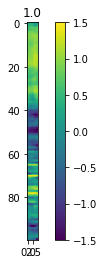

date:180323, rec:007, time:60.0


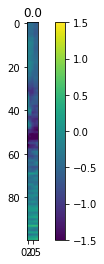

date:180324, rec:008, time:488.0


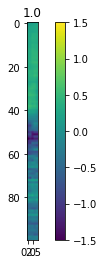

date:180401, rec:001, time:1287.0


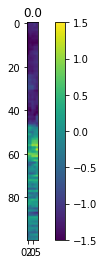

date:180325, rec:009, time:4586.0


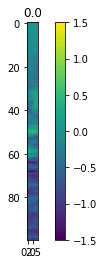

date:180322, rec:003, time:2640.0


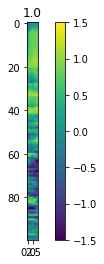

date:180324, rec:008, time:1608.0


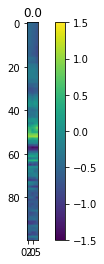

date:180325, rec:001, time:607.0


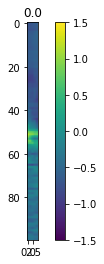

date:180327, rec:004, time:3337.0


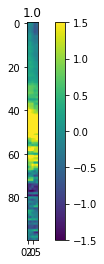

date:180327, rec:007, time:2372.0


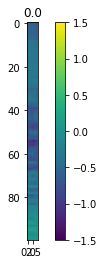

date:180401, rec:001, time:6585.0


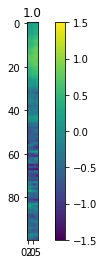

date:180401, rec:001, time:967.0


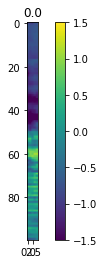

date:180327, rec:008, time:1869.0


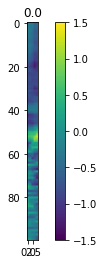

date:180327, rec:001, time:5887.0


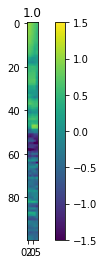

date:180324, rec:004, time:2371.0


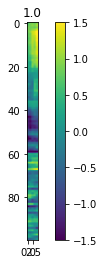

date:180324, rec:008, time:5896.0


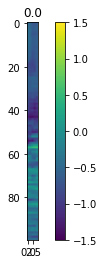

date:180327, rec:002, time:5651.0


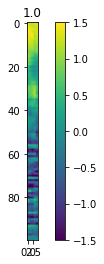

date:180327, rec:002, time:2637.0


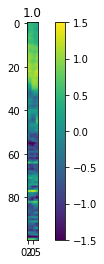

date:180324, rec:003, time:1358.0


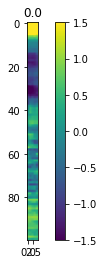

date:180323, rec:007, time:6713.0


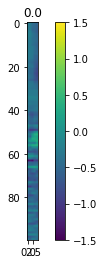

date:180323, rec:007, time:6128.0


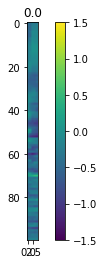

date:180323, rec:007, time:2902.0


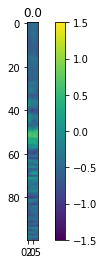

date:180325, rec:007, time:4840.0


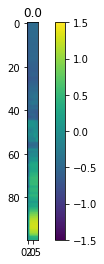

date:180325, rec:009, time:4806.0


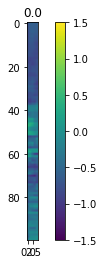

date:180401, rec:001, time:947.0


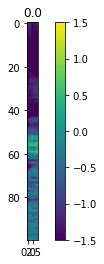

date:180325, rec:009, time:6382.0


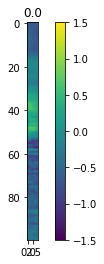

date:180401, rec:001, time:6785.0


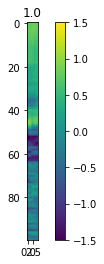

date:180327, rec:007, time:5433.0


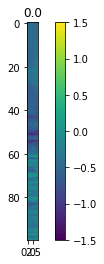

date:180323, rec:001, time:3897.0


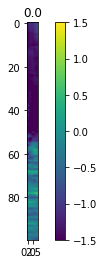

date:180325, rec:003, time:6814.0


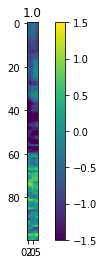

date:180322, rec:007, time:247.0


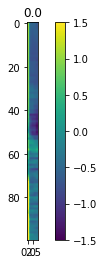

date:180327, rec:005, time:5455.0


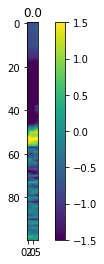

date:180327, rec:001, time:687.0


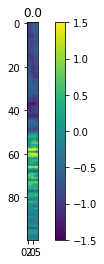

date:180325, rec:001, time:852.0


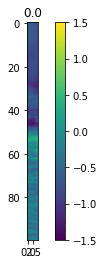

date:180323, rec:007, time:5563.0


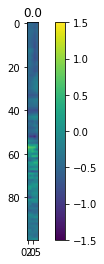

date:180327, rec:004, time:5660.0


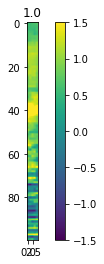

date:180327, rec:001, time:407.0


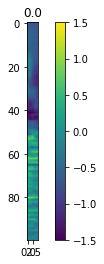

date:180326, rec:004, time:5498.0


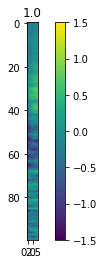

date:180327, rec:007, time:3587.0


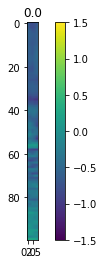

date:180327, rec:007, time:5138.0


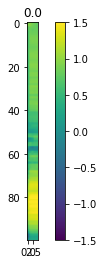

date:180324, rec:009, time:447.0


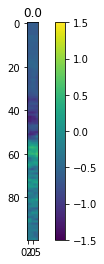

date:180325, rec:001, time:832.0


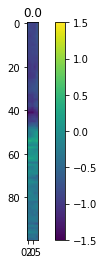

date:180322, rec:007, time:2165.0


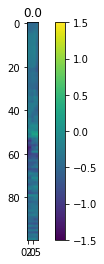

date:180323, rec:001, time:1322.0


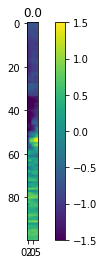

date:180322, rec:005, time:870.0


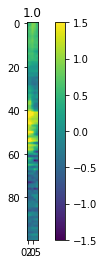

date:180327, rec:006, time:4159.0


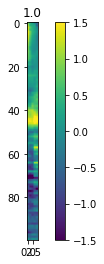

date:180324, rec:008, time:4796.0


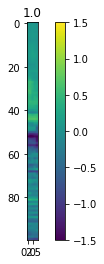

date:180324, rec:008, time:1638.0


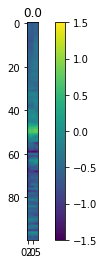

date:180325, rec:001, time:537.0


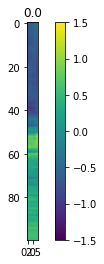

date:180324, rec:005, time:1293.0


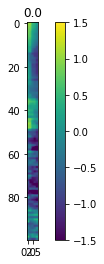

date:180325, rec:001, time:2868.0


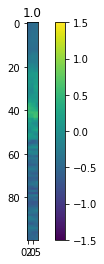

date:180327, rec:007, time:3437.0


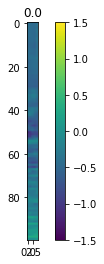

date:180327, rec:007, time:1020.0


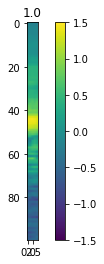

date:180327, rec:007, time:4558.0


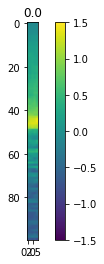

date:180323, rec:007, time:2902.0


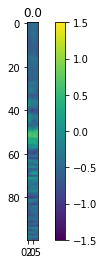

date:180327, rec:005, time:5910.0


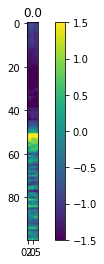

date:180325, rec:001, time:4293.0


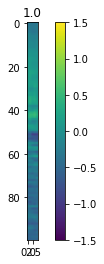

date:180324, rec:008, time:1828.0


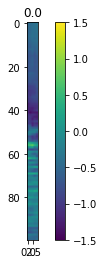

date:180322, rec:003, time:6848.0


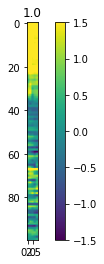

date:180324, rec:006, time:3601.0


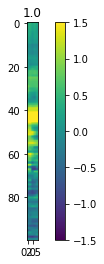

date:180324, rec:009, time:792.0


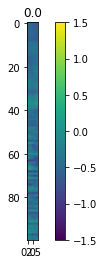

date:180326, rec:004, time:3784.0


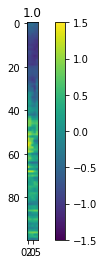

date:180327, rec:008, time:5490.0


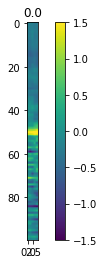

date:180324, rec:008, time:5636.0


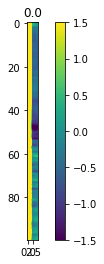

date:180325, rec:009, time:7150.0


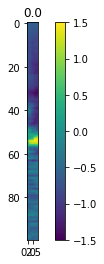

date:180325, rec:001, time:1922.0


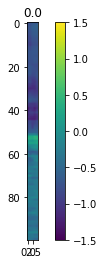

date:180401, rec:001, time:1122.0


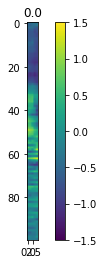

date:180323, rec:001, time:3907.0


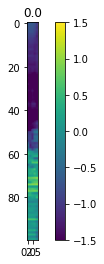

date:180325, rec:007, time:5835.0


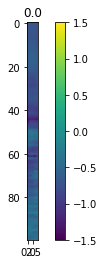

date:180323, rec:002, time:5788.0


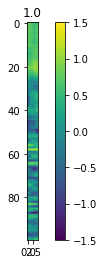

date:180325, rec:006, time:5430.0


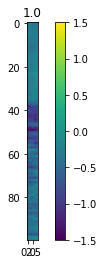

date:180327, rec:007, time:5503.0


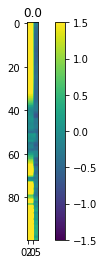

date:180327, rec:008, time:5635.0


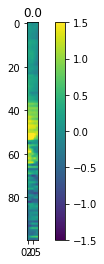

date:180327, rec:001, time:5226.0


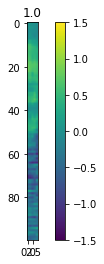

date:180323, rec:003, time:4684.0


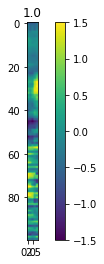

date:180325, rec:009, time:997.0


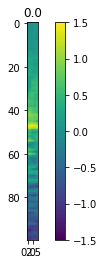

date:180325, rec:006, time:4402.0


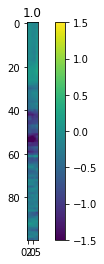

date:180323, rec:005, time:3463.0


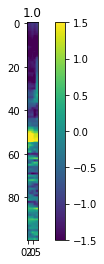

date:180322, rec:007, time:4497.0


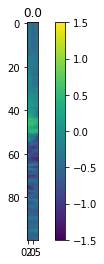

date:180324, rec:004, time:3139.0


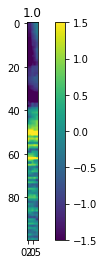

date:180325, rec:004, time:237.0


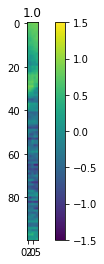

date:180325, rec:004, time:1030.0


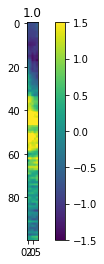

date:180327, rec:008, time:6851.0


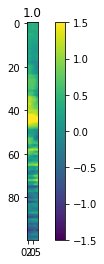

date:180327, rec:002, time:781.0


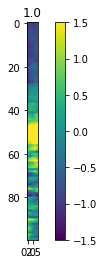

date:180322, rec:004, time:5288.0


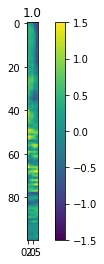

date:180327, rec:008, time:6821.0


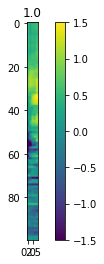

date:180325, rec:002, time:5445.0


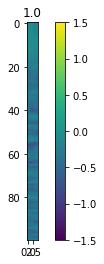

date:180324, rec:008, time:6531.0


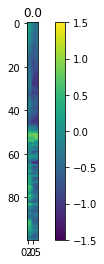

date:180324, rec:008, time:2500.0


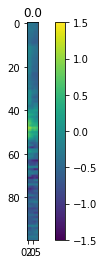

date:180325, rec:007, time:6270.0


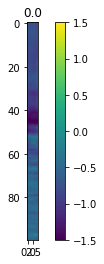

date:180327, rec:001, time:7009.0


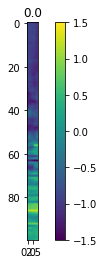

date:180325, rec:007, time:4335.0


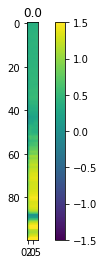

date:180325, rec:009, time:2192.0


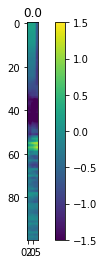

date:180327, rec:007, time:6373.0


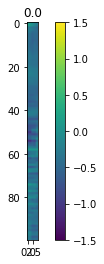

date:180322, rec:004, time:408.0


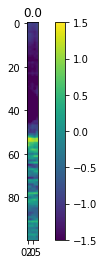

date:180325, rec:007, time:1550.0


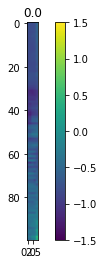

date:180324, rec:005, time:442.0


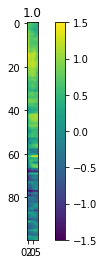

date:180325, rec:003, time:6124.0


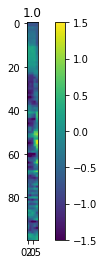

date:180324, rec:008, time:2640.0


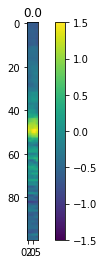

date:180323, rec:002, time:4071.0


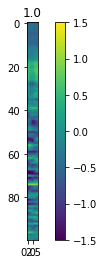

date:180324, rec:006, time:7070.0


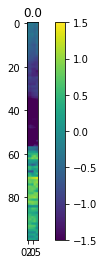

date:180324, rec:006, time:1758.0


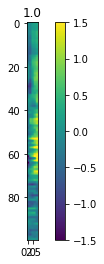

date:180326, rec:003, time:3696.0


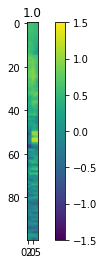

date:180401, rec:001, time:5850.0


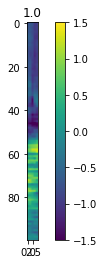

date:180327, rec:001, time:282.0


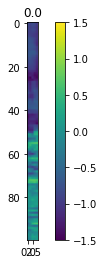

date:180322, rec:002, time:4921.0


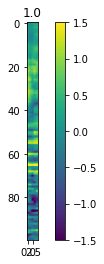

date:180327, rec:001, time:2642.0


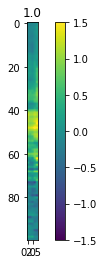

date:180324, rec:001, time:6006.0


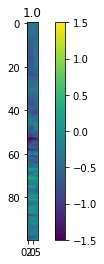

date:180327, rec:002, time:1862.0


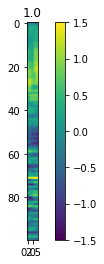

date:180327, rec:008, time:3409.0


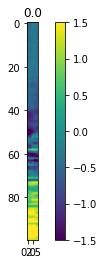

date:180327, rec:001, time:432.0


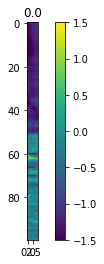

date:180324, rec:001, time:617.0


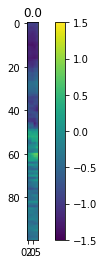

date:180325, rec:003, time:4520.0


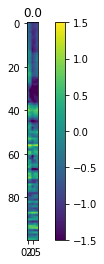

date:180327, rec:006, time:3443.0


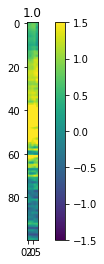

date:180325, rec:001, time:4353.0


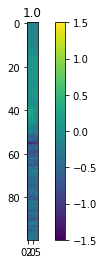

date:180325, rec:001, time:3392.0


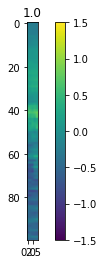

date:180327, rec:001, time:397.0


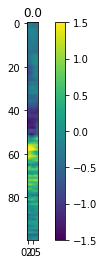

date:180327, rec:006, time:6313.0


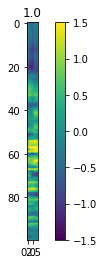

date:180325, rec:003, time:4440.0


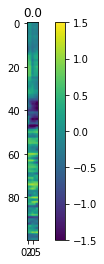

date:180401, rec:001, time:5269.0


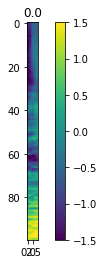

date:180327, rec:006, time:5265.0


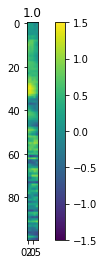

date:180324, rec:006, time:6070.0


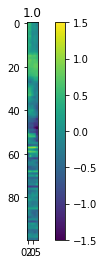

date:180327, rec:008, time:3844.0


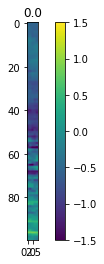

date:180324, rec:006, time:559.0


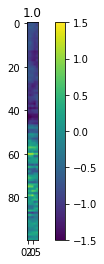

date:180323, rec:007, time:4348.0


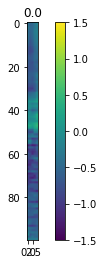

date:180324, rec:006, time:1069.0


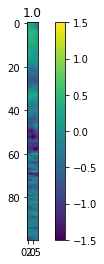

date:180325, rec:002, time:4145.0


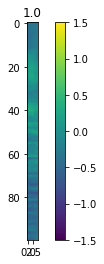

date:180325, rec:003, time:6354.0


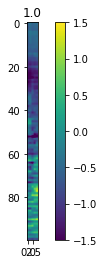

In [5]:
# movement labelled 0; non-movement labelled 1
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader):
    for i in range(128):
        print('date:{}, rec:{}, time:{}'.format(date[i], rec[i], time[i]))
        data_sub = data[i][0]
        plt.imshow(data_sub)
        plt.clim(-1.5, 1.5)
        plt.colorbar()
        plt.title(label[i][0].numpy())
        plt.show()
    break

### Logistic regression with no regularization

In [10]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0
model_type = 'LR'
loss_type = 'bce'
reg_type = 'none'
CH = 'all'
timewindow = 5
model_save_path ='/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_5s_1st_1_upsample'

model = GLM(62*100*5).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [12]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha,timewindow = timewindow, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, timewindow = timewindow, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = model_save_path
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 0.5081825852394104
Val loss for epoch 0: 0.791525661945343
Train loss for epoch 1: 0.41828399896621704
Val loss for epoch 1: 0.7060482501983643
1
Train loss for epoch 2: 0.3955896198749542
Val loss for epoch 2: 0.6888312101364136
2
Train loss for epoch 3: 0.3707579970359802
Val loss for epoch 3: 0.738046407699585
Train loss for epoch 4: 0.3683319389820099
Val loss for epoch 4: 0.7426619529724121
Train loss for epoch 5: 0.34104469418525696
Val loss for epoch 5: 0.5674036741256714
5
Train loss for epoch 6: 0.36108750104904175
Val loss for epoch 6: 0.7900071144104004
Train loss for epoch 7: 0.309848815202713
Val loss for epoch 7: 0.6665672659873962
Train loss for epoch 8: 0.3436304032802582
Val loss for epoch 8: 0.8314254879951477
Train loss for epoch 9: 0.31509703397750854
Val loss for epoch 9: 0.84336256980896
Train loss for epoch 10: 0.32567426562309265
Val loss for epoch 10: 0.7752657532691956
Train loss for epoch 11: 0.31013768911361694
Val loss for epoch 11: 

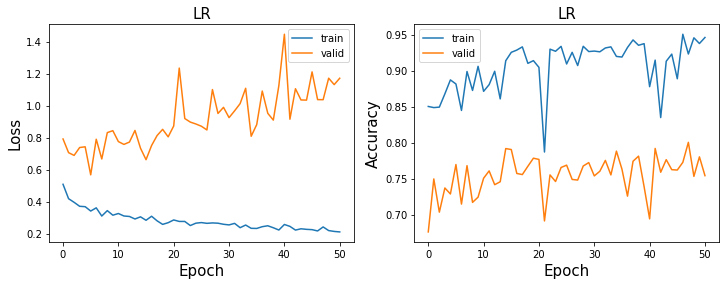

In [13]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type) # new

In [14]:
timewindow

5

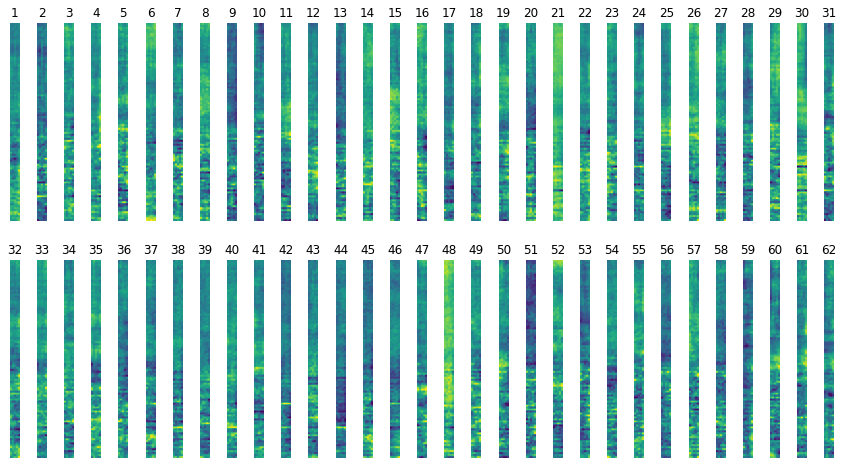

In [15]:
model = GLM(62*100*timewindow).to(device)
path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_5s_1st_1_upsample'
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(62, 100, timewindow)
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = weights[i].detach().cpu()
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(i+1))
    # plt.clim(-0.03, 0.03)
plt.show()

In [16]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_0 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

test loss:0.6015680432319641 accuracy:0.7801658853227551


In [17]:
np.mean(np.concatenate(test_labels))

0.73472774

In [18]:
path_wrong = '/mnt/pesaranlab/People/Capstone_students/Yue/wrong_pred'
pickle.dump(cases_wrong_0, open('{}/{}_CH{}_LOSS{}_REG{}{}.pt'.format(path_wrong, model_type, CH, loss_type, reg_type, alpha), 'wb'))

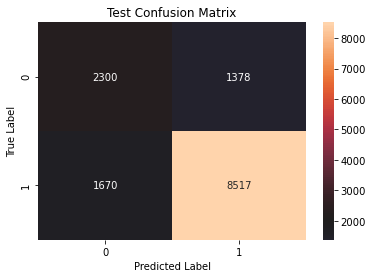

In [19]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180331, rec:004, time:1747.0, label:1.0
Original data 62 CH


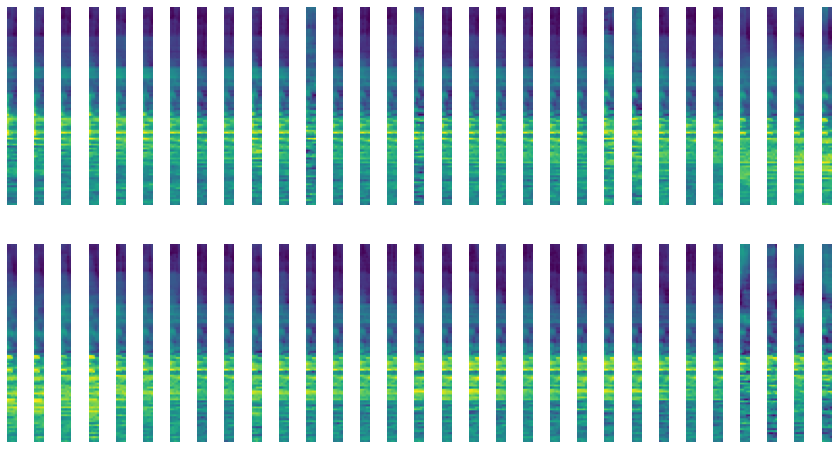

In [20]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_0[0][0], cases_wrong_0[0][1], cases_wrong_0[0][2], cases_wrong_0[0][3]))
print('Original data 62 CH')
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = cases_wrong_0[0][-1][i]
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
plt.show()

### Logistic regression with L2 regularization

In [5]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0.1
model_type = 'LR'
loss_type = 'bce'
reg_type = 'l2'
CH = 'all'
model_save_path ='/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_5s_1st_1_upsample'
timewindow = 5
    
model = GLM(62*100*5).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [6]:
model_save_path

'/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_5s_1st_1_upsample'

In [7]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, timewindow = timewindow, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, timewindow = timewindow, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = model_save_path
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 0.523256242275238
Val loss for epoch 0: 0.7515998482704163
Train loss for epoch 1: 0.4158408045768738
Val loss for epoch 1: 0.5643904209136963
1
Train loss for epoch 2: 0.409782350063324
Val loss for epoch 2: 0.6717388033866882
Train loss for epoch 3: 0.3654421269893646
Val loss for epoch 3: 0.5946015119552612
Train loss for epoch 4: 0.3535420894622803
Val loss for epoch 4: 1.0563859939575195
Train loss for epoch 5: 0.33571338653564453
Val loss for epoch 5: 0.6072947978973389
Train loss for epoch 6: 0.32884982228279114
Val loss for epoch 6: 0.7877876162528992
Train loss for epoch 7: 0.333879679441452
Val loss for epoch 7: 0.6239502429962158
Train loss for epoch 8: 0.33077874779701233
Val loss for epoch 8: 0.6932947635650635
Train loss for epoch 9: 0.31880709528923035
Val loss for epoch 9: 0.8409422039985657
Train loss for epoch 10: 0.31841087341308594
Val loss for epoch 10: 0.7945773005485535
Train loss for epoch 11: 0.30262434482574463
Val loss for epoch 11: 0.

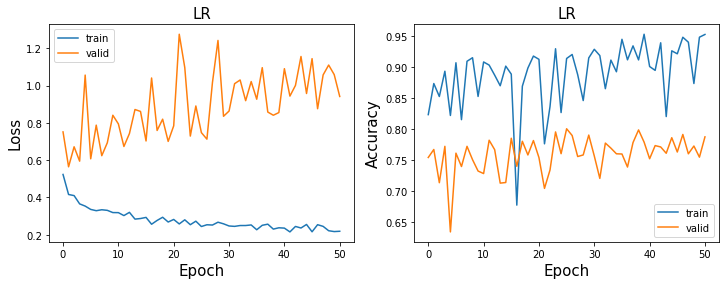

In [8]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type) # new

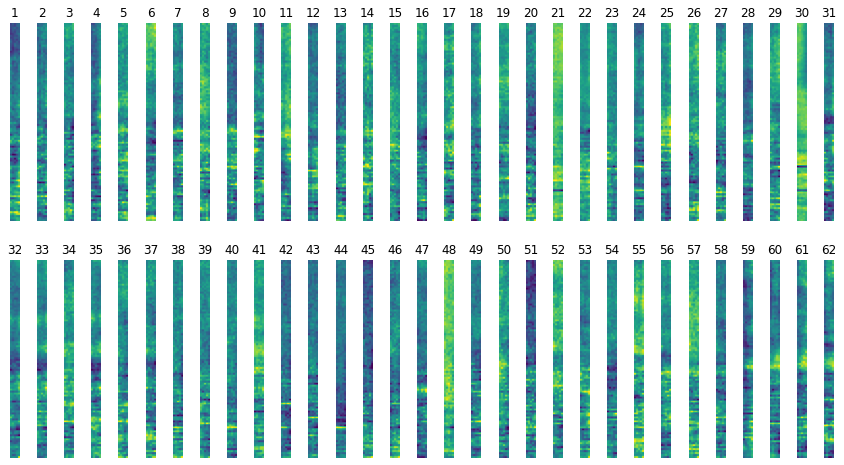

In [9]:
model = GLM(62*100*5).to(device)
path = model_save_path
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(62, 100, 5)
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = weights[i].detach().cpu()
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(i+1))
    # plt.clim(-0.03, 0.03)
plt.show()

In [10]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_1 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

test loss:0.5391950607299805 accuracy:0.8090155066714749


In [11]:
np.mean(np.concatenate(test_labels))

0.73472774

In [12]:
path_wrong = '/mnt/pesaranlab/People/Capstone_students/Yue/wrong_pred'
pickle.dump(cases_wrong_1, open('{}/{}_CH{}_LOSS{}_REG{}{}.pt'.format(path_wrong, model_type, CH, loss_type, reg_type, alpha), 'wb'))

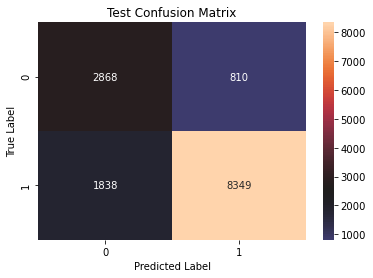

In [13]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=2500)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180331, rec:004, time:004, label:1.0
Original data 62 CH


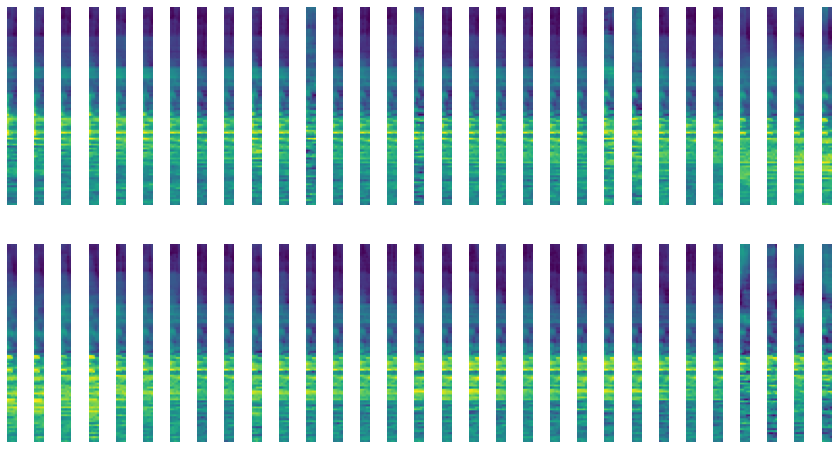

In [14]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_1[0][0], cases_wrong_1[0][1], cases_wrong_1[0][1], cases_wrong_1[0][3]))
print('Original data 62 CH')
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = cases_wrong_1[0][-1][i]
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
plt.show()

### Logistic Regression with finite difference regularization

In [21]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 34
alpha = 0.1
model_type = 'LR'
loss_type = 'bce'
reg_type = 'finite_diff'
CH = 'all'
model_save_path ='/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_5s_1st_1_upsample'
timewindow = 5

model = GLM(62*100*timewindow).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [22]:
model_save_path

'/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_5s_1st_1_upsample'

In [23]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, timewindow =timewindow, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha,timewindow =timewindow, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = model_save_path
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 0.5145804286003113
Val loss for epoch 0: 0.6617032885551453
Train loss for epoch 1: 0.4138292670249939
Val loss for epoch 1: 0.9233746528625488
Train loss for epoch 2: 0.3988606631755829
Val loss for epoch 2: 0.6650593876838684
Train loss for epoch 3: 0.3871309459209442
Val loss for epoch 3: 0.7925273776054382
Train loss for epoch 4: 0.3536694347858429
Val loss for epoch 4: 0.8967751264572144
Train loss for epoch 5: 0.3425307273864746
Val loss for epoch 5: 0.6155238747596741
5
Train loss for epoch 6: 0.3324527442455292
Val loss for epoch 6: 0.6628608703613281
Train loss for epoch 7: 0.32146915793418884
Val loss for epoch 7: 0.8258256316184998
Train loss for epoch 8: 0.3114011287689209
Val loss for epoch 8: 0.7464326024055481
Train loss for epoch 9: 0.31116247177124023
Val loss for epoch 9: 0.7649933695793152
Train loss for epoch 10: 0.3086417317390442
Val loss for epoch 10: 0.8261868953704834
Train loss for epoch 11: 0.29362818598747253
Val loss for epoch 11: 0.

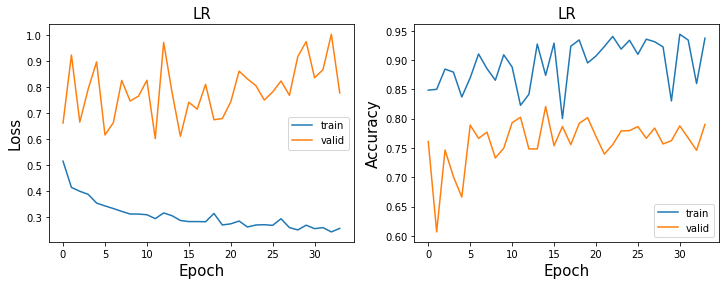

In [24]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type) # new

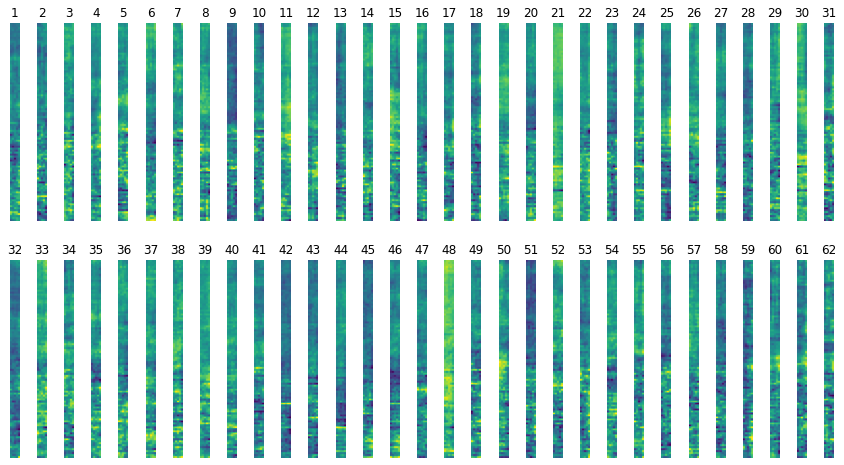

In [25]:
model = GLM(62*100*5).to(device)
path = model_save_path
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(62, 100, 5)
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = weights[i].detach().cpu()
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(i+1))
    # plt.clim(-0.03, 0.03)
plt.show()

In [26]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_2 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

test loss:0.7239821553230286 accuracy:0.7728092318788315


In [27]:
np.mean(np.concatenate(test_labels))

0.73472774

In [28]:
path_wrong = '/mnt/pesaranlab/People/Capstone_students/Yue/wrong_pred'
pickle.dump(cases_wrong_2, open('{}/{}_CH{}_LOSS{}_REG{}{}.pt'.format(path_wrong, model_type, CH, loss_type, reg_type, alpha), 'wb'))

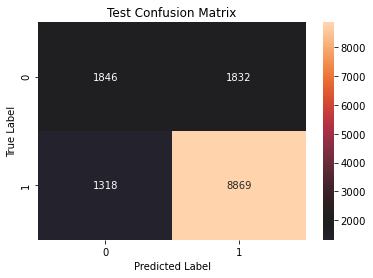

In [29]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180331, rec:004, time:1747.0, label:1.0
Original data 62 CH


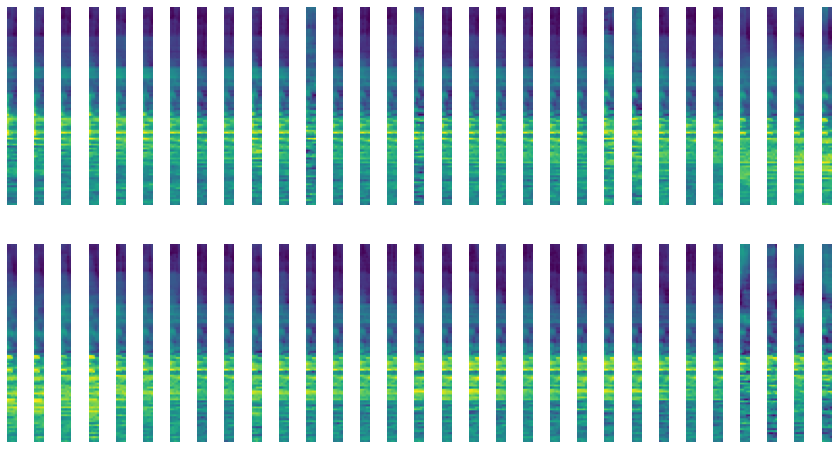

In [31]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_2[0][0], cases_wrong_2[0][1], cases_wrong_2[0][2], cases_wrong_2[0][3]))
print('Original data 62 CH')
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = cases_wrong_2[0][-1][i]
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
plt.show()

Done from here. Haven't done SVM.

### SVM without regularization

In [34]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0 
model_type = 'SVM'
loss_type = 'hinge'
reg_type = 'none' # expect to be bad, since predictions could be arbitrarily far from boundaries
CH = 'all'
timewindow = 5

model = GLM(62*100*timewindow).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [35]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader,timewindow = timewindow, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, timewindow = timewindow, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

KeyboardInterrupt: 

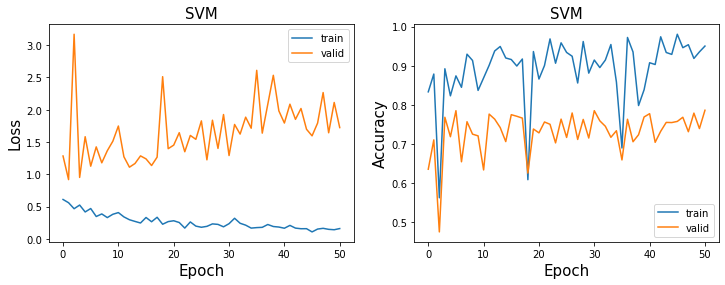

In [14]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [23]:
best_epoch = 1

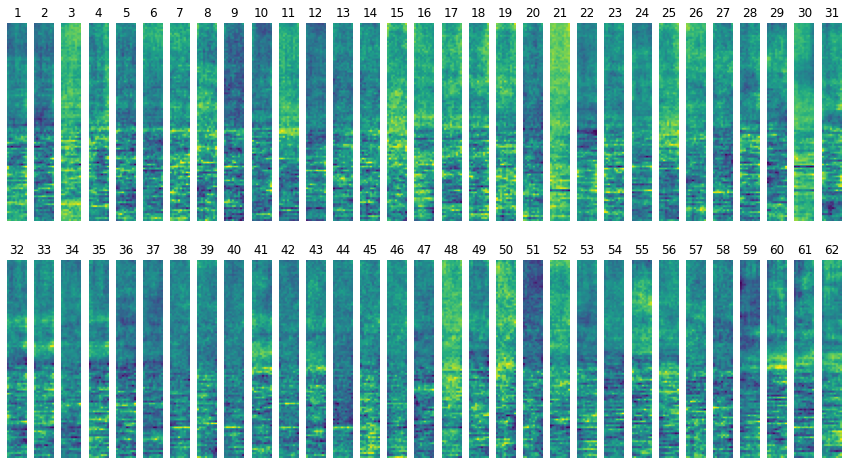

In [24]:
model = GLM().to(device)
path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(62, 100, 10)
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = weights[i].detach().cpu()
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(i+1))
    # plt.clim(-0.03, 0.03)
plt.show()

In [27]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_3 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

test loss:0.7428555488586426 accuracy:0.7838461538461539


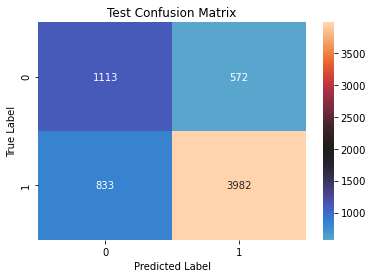

In [28]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180330, rec:007, time:007, label:1.0
Original data 62 CH


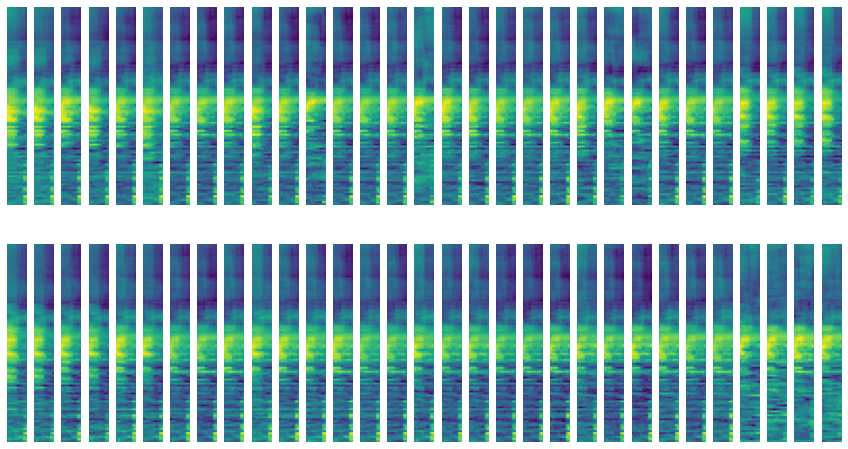

In [30]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_3[0][0], cases_wrong_3[0][1], cases_wrong_3[0][1], cases_wrong_3[0][3]))
print('Original data 62 CH')
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = cases_wrong_3[0][-1][i]
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
plt.show()

### SVM with L2 regularization

In [31]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0.5 # have special meaning as margin, corresponding to 1 in the hinge loss
model_type = 'SVM'
loss_type = 'hinge'
reg_type = 'l2'
CH = 'all'

model = GLM().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [16]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 1.142331600189209
Val loss for epoch 0: 2.375016927719116
Train loss for epoch 1: 0.8872479200363159
Val loss for epoch 1: 0.9689788222312927
1
Train loss for epoch 2: 0.9464882612228394
Val loss for epoch 2: 1.0704563856124878
Train loss for epoch 3: 0.8319297432899475
Val loss for epoch 3: 1.3819953203201294
Train loss for epoch 4: 0.9815953969955444
Val loss for epoch 4: 2.2135136127471924
Train loss for epoch 5: 0.9559652209281921
Val loss for epoch 5: 1.3571209907531738
Train loss for epoch 6: 0.9480046629905701
Val loss for epoch 6: 0.958657443523407
6
Train loss for epoch 7: 0.8747104406356812
Val loss for epoch 7: 1.0527974367141724
Train loss for epoch 8: 0.938942551612854
Val loss for epoch 8: 1.816292405128479
Train loss for epoch 9: 1.033324956893921
Val loss for epoch 9: 1.2031350135803223
Train loss for epoch 10: 0.908989667892456
Val loss for epoch 10: 0.6989802718162537
10
Train loss for epoch 11: 0.9314482808113098
Val loss for epoch 11: 1.08010

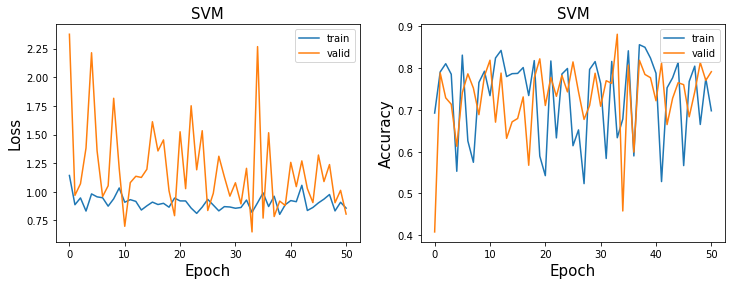

In [17]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [32]:
best_epoch = 33

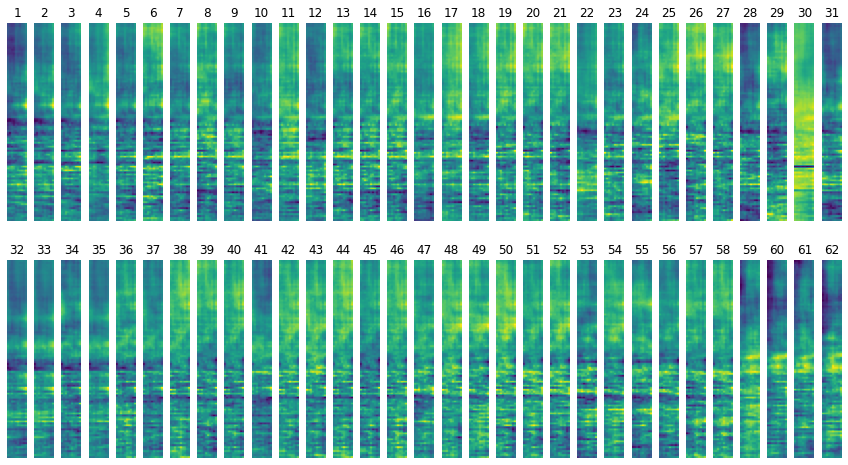

In [33]:
model = GLM().to(device)
path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(62, 100, 10)
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = weights[i].detach().cpu()
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(i+1))
    # plt.clim(-0.03, 0.03)
plt.show()

In [34]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_4 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

test loss:1.2684636116027832 accuracy:0.7512307692307693


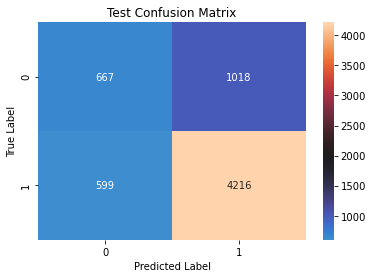

In [35]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180330, rec:007, time:007, label:1.0
Original data 62 CH


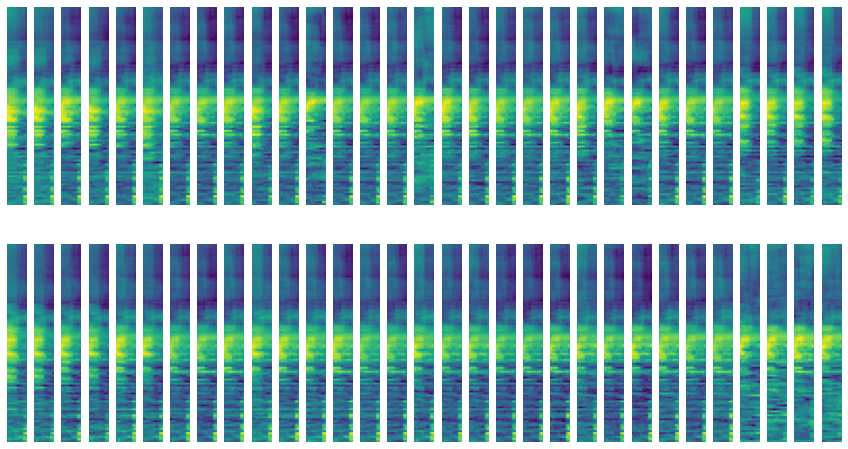

In [36]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_4[0][0], cases_wrong_4[0][1], cases_wrong_4[0][1], cases_wrong_4[0][3]))
print('Original data 62 CH')
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = cases_wrong_4[0][-1][i]
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
plt.show()

### SVM with finite difference regularization

In [37]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0.5
model_type = 'SVM'
loss_type = 'hinge'
reg_type = 'finite_diff'
CH = 'all'

model = GLM().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [19]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 1.1333791017532349
Val loss for epoch 0: 1.699452519416809
Train loss for epoch 1: 0.7799455523490906
Val loss for epoch 1: 1.1568527221679688
1
Train loss for epoch 2: 0.8088831305503845
Val loss for epoch 2: 1.5023279190063477
Train loss for epoch 3: 0.7681555151939392
Val loss for epoch 3: 1.125550389289856
3
Train loss for epoch 4: 0.779151201248169
Val loss for epoch 4: 0.9314382076263428
4
Train loss for epoch 5: 0.6864786744117737
Val loss for epoch 5: 1.0832509994506836
Train loss for epoch 6: 0.6971858739852905
Val loss for epoch 6: 1.0215011835098267
Train loss for epoch 7: 0.7639809250831604
Val loss for epoch 7: 1.7163935899734497
Train loss for epoch 8: 0.7523619532585144
Val loss for epoch 8: 1.3559271097183228
Train loss for epoch 9: 0.837641179561615
Val loss for epoch 9: 1.0237863063812256
Train loss for epoch 10: 0.7160231471061707
Val loss for epoch 10: 1.128845453262329
Train loss for epoch 11: 0.7040753364562988
Val loss for epoch 11: 3.2867

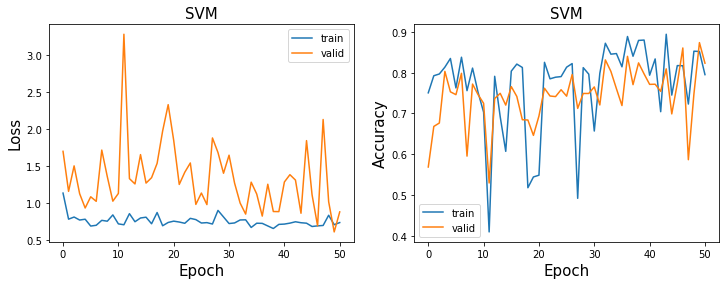

In [20]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [38]:
best_epoch = 49

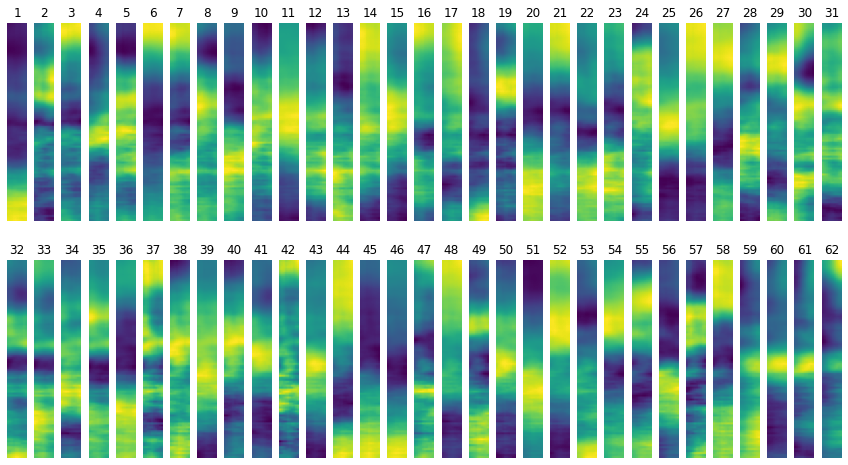

In [39]:
model = GLM().to(device)
path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(62, 100, 10)
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = weights[i].detach().cpu()
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(i+1))
    # plt.clim(-0.03, 0.03)
plt.show()

In [40]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_5 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

test loss:0.8956817984580994 accuracy:0.8355384615384616


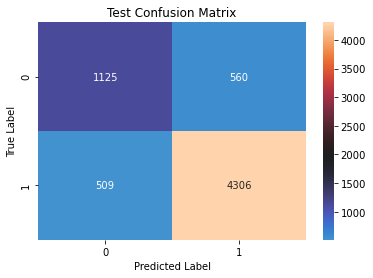

In [41]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180330, rec:007, time:007, label:1.0
Original data 62 CH


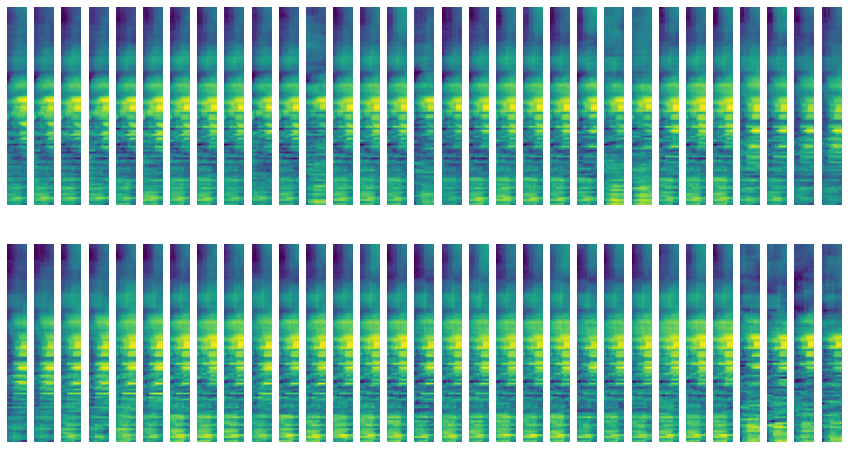

In [42]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_5[0][0], cases_wrong_5[0][1], cases_wrong_5[0][1], cases_wrong_5[0][3]))
print('Original data 62 CH')
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = cases_wrong_5[0][-1][i]
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
plt.show()